In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scienceplots
plt.style.use(['science', 'notebook', 'grid'])
from numpy.fft import fft, fftfreq, fftshift
pi = np.pi

# 1a

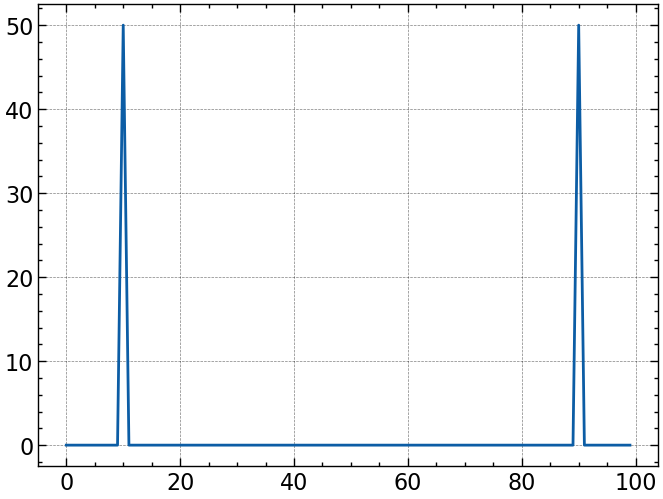

In [2]:
N = np.arange(100)
t = 0.1*pi*N
def generate_data(time, omega):
    return np.cos(omega*time)
d = generate_data(t, omega=2)
sp = np.fft.fft(d)
plt.plot(N, np.abs(sp))
plt.show()

# 1b

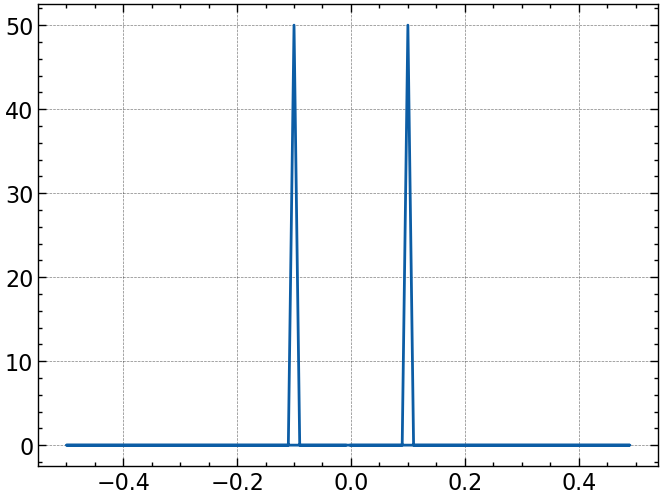

In [3]:
freq = np.fft.fftfreq(N.shape[-1])
plt.plot(freq, np.abs(sp))
plt.show()

# 1c

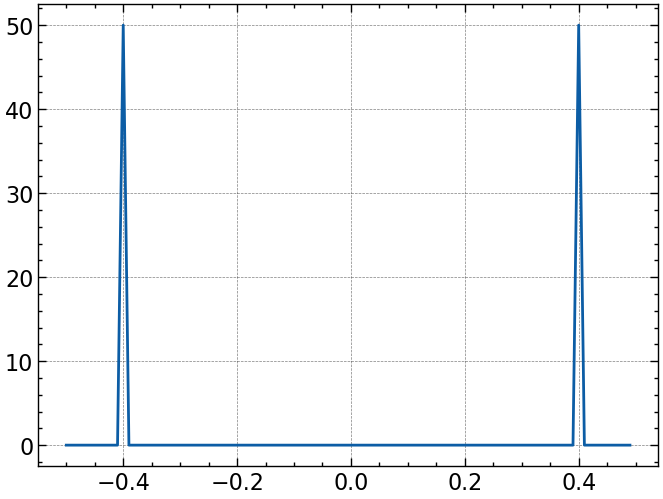

In [4]:
plt.plot(np.fft.fftshift(freq), np.abs(sp))
plt.show()

# 1d

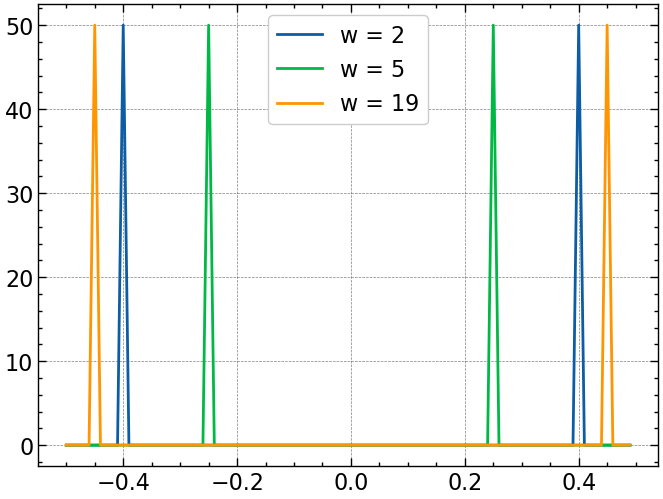

In [5]:
d2 = generate_data(t, 5)
d3 = generate_data(t, 19)

sp2 = np.fft.fft(d2)
sp3 = np.fft.fft(d3)

plt.plot(fftshift(freq), np.abs(sp), label = "w = 2")
plt.plot(fftshift(freq), np.abs(sp2), label = "w = 5")
plt.plot(fftshift(freq), np.abs(sp3), label = "w = 19")
plt.legend()
plt.show()

# 1e

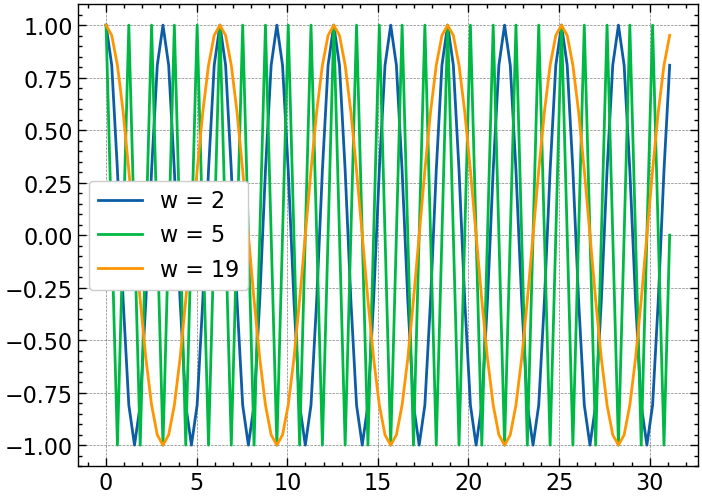

In [6]:
fig, ax = plt.subplots()
ax.plot(t, d, label = "w = 2")
ax.plot(t, d2, label = "w = 5")
ax.plot(t, d3, label = "w = 19")
plt.legend()
plt.show()

# 2a

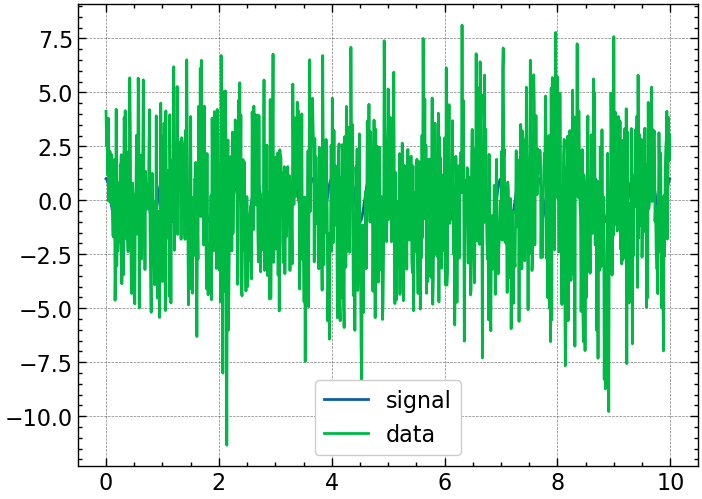

In [14]:
N = np.arange(1000)
t = 0.01* N
d = np.cos(6*pi*t) + np.random.normal(0, 3, 1000)
signal = np.cos(6*pi*t)
plt.plot(t, signal, label = "signal")
plt.plot(t, d, label = "data")
plt.legend()
# maybe subplot?

# 2b

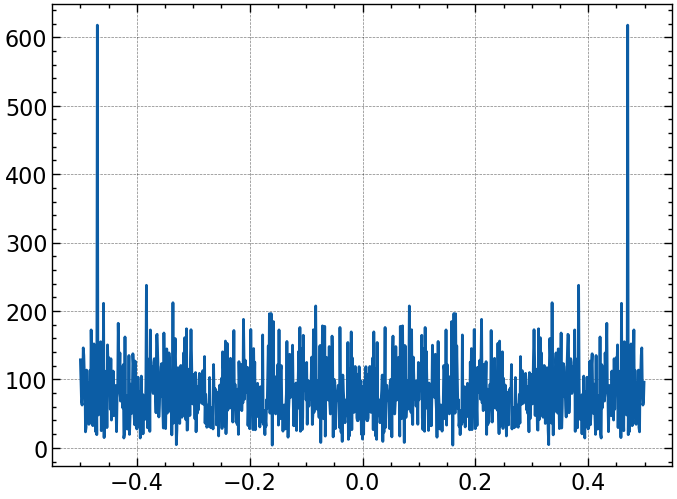

In [16]:
sp = fft(d)
freq = fftfreq(N.shape[-1])
plt.plot(fftshift(freq), np.abs(sp))

# 2c

In [ ]:
N = np.arange(100)
t = 0.01* N
d = np.cos(6*pi*t) + np.random.normal(0, 3, 1000)

N = np.arange(3000)
t = 0.01* N
d = np.cos(6*pi*t) + np.random.normal(0, 3, 1000)

N = np.arange(6000)
t = 0.01* N
d = np.cos(6*pi*t) + np.random.normal(0, 3, 1000)